<a href="https://colab.research.google.com/github/ba88052/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url_train = "https://raw.githubusercontent.com/ba88052/titanic-analysis/main/Titanic_Data/train.csv"
url_test = "https://raw.githubusercontent.com/ba88052/titanic-analysis/main/Titanic_Data/test.csv"
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

#Day 2 鐵達尼號存活預測 - 建立第一個 Baseline 版本

##1. 在你的 Colab 程式碼中載入 `train.csv` 資料集，可以參考這一篇 教學。

In [ ]:
import pandas as pd

url_train = "https://raw.githubusercontent.com/ba88052/titanic-analysis/main/Titanic_Data/train.csv"
url_test = "https://raw.githubusercontent.com/ba88052/titanic-analysis/main/Titanic_Data/test.csv"
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

##2. 請瞭解該資料中所有欄位的定義為何？

Survived: 0 = No 1 = Yes

PassengerId: ID號碼，從1到891號

Sex: 男女生理性別 male= 男 female= 女 （需轉成編碼）

SibSp: 兄弟姊妹或是配偶數量
兄弟姐妹=兄弟，姐妹，繼兄弟，繼妹
配偶=丈夫，妻子（情婦和未婚夫被忽略）

Age: 年歲 年齡小於1時為小數。如果年齡是估計的，是xx.5的形式嗎

Name:名字 可拿掉

Embarked: 登船港口 C = Cherbourg, Q = Queenstown, S = Southampton 需轉成one hot編碼

Fare: 乘客票價

Cabin: 客艙號（有許多遺漏值）

Pclass: 倉位 1 = 1st, 2 = 2nd, 3 = 3rd 

Parch: 父母或孩子
父母=母親，父親
孩子 = 女兒、兒子、繼女、繼子
有些孩子只和保姆一起旅行，因此他們的 parch=0。

Ticket: 船票編號


##3. 進一步觀察其他「數值欄位/類別欄位」的屬性與「是否生存欄位」之關係程度，找出關係大的欄位。

In [ ]:
#查看資料型態
# df_train.describe()
# df_train.describe(include=[object])
# df_train.describe(include='all')
# df_train.info()

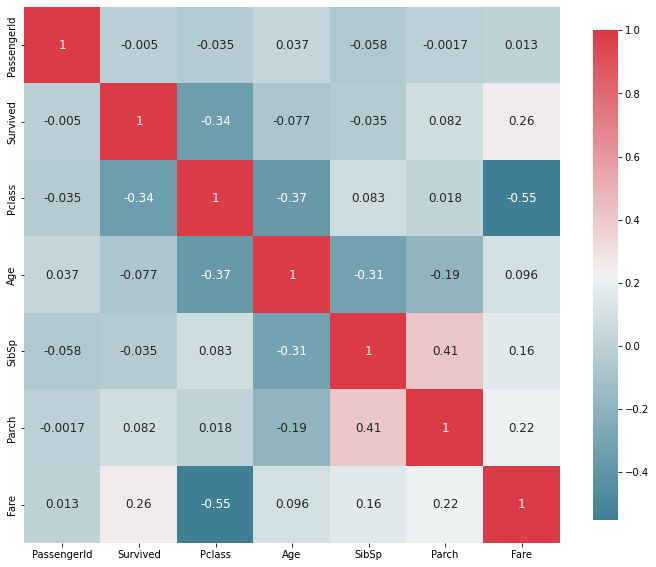

In [ ]:
#相關係數熱圖 
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

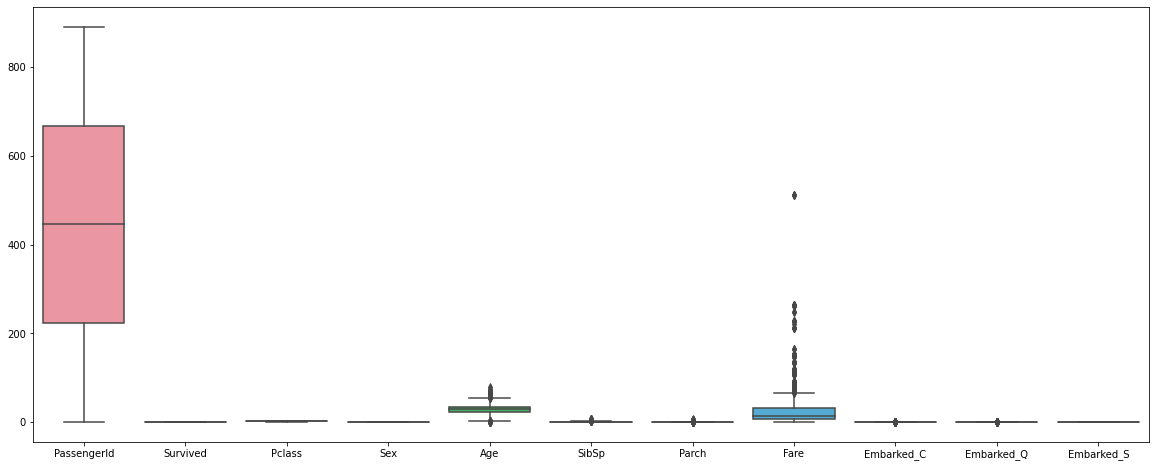

In [ ]:
#箱形圖，查看是否有數據離散程度
plt.figure(figsize = (20, 8))
sns.boxplot(data = df_train, width = 0.8)
plt.show()

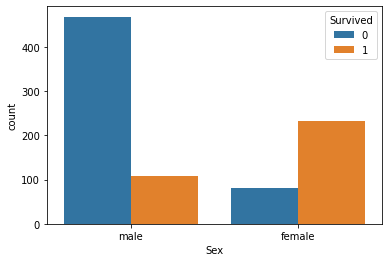

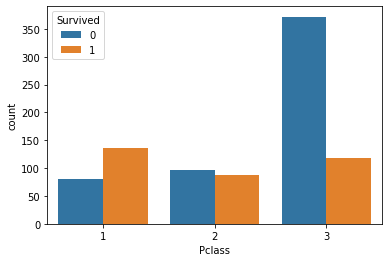

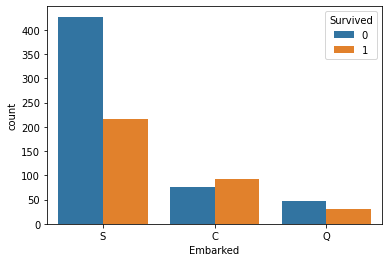

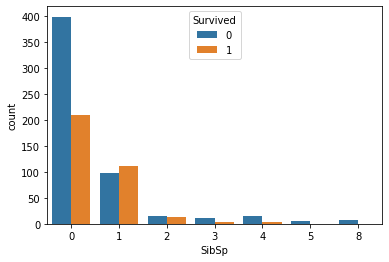

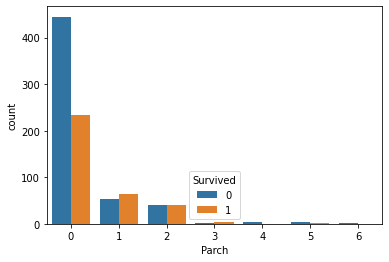

In [ ]:
#長條對比圖 性別
import matplotlib.pyplot as plt
import seaborn as sns
selected_cols = ['Sex','Pclass','Embarked','SibSp','Parch']
for i in selected_cols:
  sns.countplot(x=i ,hue='Survived',data=df_train)
  plt.show()

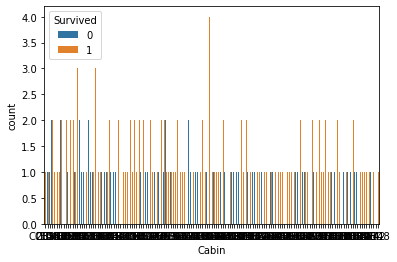

In [ ]:
#長條對比圖 Cabin
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Cabin',hue='Survived',data=df_train)

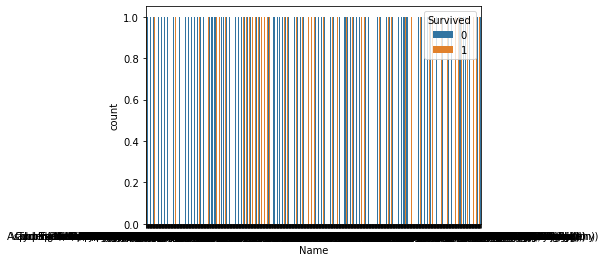

In [ ]:
#長條對比圖 Name
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Name',hue='Survived',data=df_train)

##4. 請進行「必要」的資料前處理操作，讓資料變成可以跑得動模型的格式即可。

In [ ]:
#初步清理資料

#將性別轉成編碼
sex_encoding = {
    'male': 0,
    'female': 1
}
df_train['Sex'] = df_train['Sex'].map(lambda d: sex_encoding[d])

#將艙等獨熱編碼
df_train = pd.get_dummies(df_train, columns = ["Embarked"])

#Age填上平均值
df_train["Age"].fillna(value = df_train["Age"].mean(), inplace = True)


#刪除姓名、船票編號、客艙號
try:
  df_train = df_train.drop(["Name", "Ticket", "Cabin"],axis=1)
  df_train = df_train.drop("Name",axis=1)
except:
  print("已經修改完成")


##5. 最後請將資料接著執行下方範例，看看能否產出結果呢。

In [ ]:
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores
#random_state：隨機數種子，int類型，可選參數，默認爲無，僅在正則化優化算法爲sag,liblinear時有用。
#max_iter：算法收斂最大迭代次數，int類型，默認爲10。僅在正則化優化算法爲newton-cg, sag和lbfgs纔有用，算法收斂的最大迭代次數。/

array([0.78212291, 0.78651685, 0.78089888, 0.76966292, 0.81460674])

#Day03 鐵達尼號存活預測 - 運用資料與特徵優化分析

##1. 延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？

（Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）

In [ ]:
#關係係數比較高，影響比重就比較大


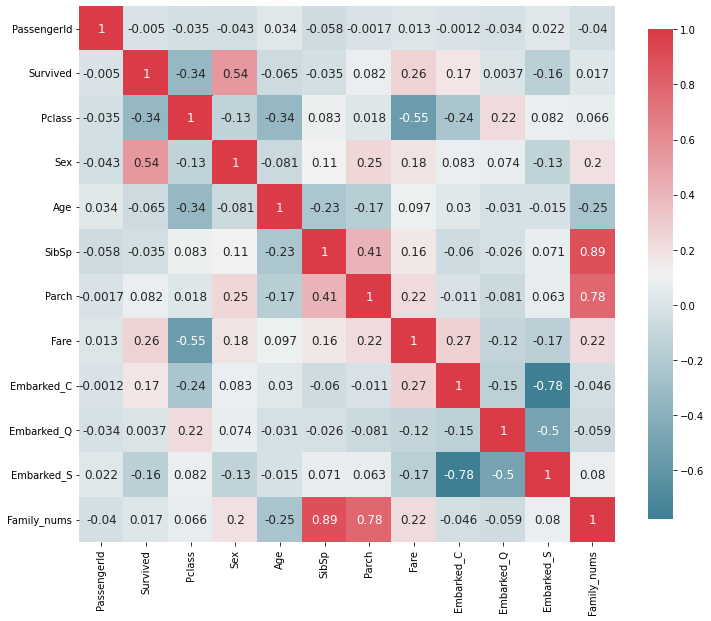

In [ ]:
#相關係數熱圖 
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

In [ ]:
corr["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked_C     0.168240
Embarked_Q     0.003650
Embarked_S    -0.155660
Family_nums    0.016639
Name: Survived, dtype: float64

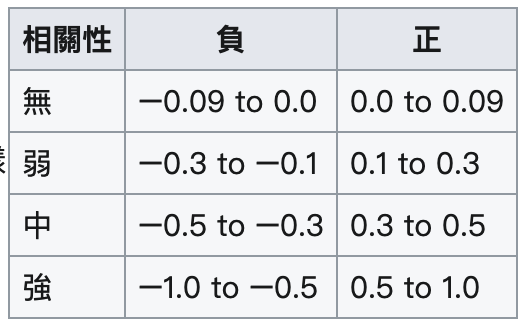

In [ ]:
"""
PassengerId   -0.005007
Pclass        -0.338481
Sex            0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked_C     0.168240
Embarked_Q     0.003650
Embarked_S    -0.155660
"""
#Pclass Sex Fare 和Embarked 在哪登船，影響都比較顯著，至少超過0.1，且sex超過0.5，是其中最顯著的。

'\nPassengerId   -0.005007\nPclass        -0.338481\nSex            0.543351\nAge           -0.077221\nSibSp         -0.035322\nParch          0.081629\nFare           0.257307\nEmbarked_C     0.168240\nEmbarked_Q     0.003650\nEmbarked_S    -0.155660\n'

In [ ]:
import matplotlib.gridspec as gridspec
selected_cols = ['Sex','Pclass','Embarked','SibSp','Parch']
plt.figure( figsize=(10,len(selected_cols)*5) )
gs = gridspec.GridSpec(len(selected_cols),1)    
for i, col in enumerate( df_train[selected_cols] ) :        
    ax = plt.subplot( gs[i] )
    sns.countplot( df_train[col], hue=df_train.Survived, palette=['lightcoral','skyblue'] )
    ax.set_yticklabels([])
    ax.set_ylabel( 'Counts' )
    ax.legend( loc=1 )   # upper right:1 ; upper left:2
    for p in ax.patches:
        ax.annotate( '{:,}'.format(p.get_height()), (p.get_x(), p.get_height()+1.5) )
plt.show()

KeyError: ignored

<Figure size 720x1800 with 0 Axes>

##2. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？


本來覺得有很多東西可以移除，但在看了文章後，覺得都好重要qq

但我基本上還是先移除名字、客艙號、船票編號

##3. 請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。

In [ ]:
#Age填上中位數
df_train["Age"].fillna(value = df_train["Age"].median() , inplace = True)

#Age填上平均值
# df_train["Age"].fillna(value = df_train["Age"].mean(), inplace = True)

##4. 請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。

In [ ]:
#性別進行編碼
sex_encoding = {
    'male': 0,
    'female': 1
}
df_train['Sex'] = df_train['Sex'].map(lambda d: sex_encoding[d])

#將登船地點獨熱編碼
df_train = pd.get_dummies(df_train, columns = ["Embarked"])

##5. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。

In [ ]:
#加入Family_nums欄位（為Parch + SibSp)
df_train["Family_nums"] = df_train["Parch"] + df_train["SibSp"]

In [ ]:
#刪除姓名、船票編號、客艙號
try:
  df_train = df_train.drop(["Name", "Ticket", "Cabin"],axis=1)
  df_train = df_train.drop("Name",axis=1)
except:
  print("已經修改完成")
df_train

##6.最後，請將資料接著執行下方範例，產生新的結果之後並且截圖且存成一次新的 Commit。

In [ ]:
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.83240223, 0.81460674, 0.79775281, 0.83146067, 0.85393258])

#Day04 專題實作 #01：鐵達尼號存活預測 - 模型優化與比較


##清理數據

In [ ]:
#分出姓氏
def get_Surname(df):
    df['Surname'] = df.Name.str.split(', ', expand=True)[0]

##分出Title 並將Title分成 Officer Royalty Mr Mrs Miss Master

def get_titles(df):
    df['Title'] = df.Name.str.split(', ', expand=True)[1]
    df['Title'] = df.Title.str.split('.', expand=True)[0]

    Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr" : "Officer",
    "Rev": "Officer",
    "Jonkheer" : "Royalty",
    "Don" : "Royalty",
    "Sir" : "Royalty",
    "Lady" : "Royalty",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master"
}
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    df['Title'] = df.Title.map(Title_Dictionary)

#性別進行編碼
def get_sex(df):
    sex_encoding = {
        'male': 0,
        'female': 1
    }
    df['Sex'] = df['Sex'].map(lambda d: sex_encoding[d])

#加入Family_size欄位（為Parch + SibSp+1)，並區分家庭大小
def get_family_size(df):
    df["Family_size"] = df["Parch"] + df["SibSp"] +1
    df['Single'] = df['Family_size'].map(lambda s: 1 if s == 1 else 0)
    df['Small'] = df['Family_size'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    df['Large'] = df['Family_size'].map(lambda s: 1 if 5 <= s else 0)

#cabin拉出是否有艙號
def get_cabin(df):
    df['Cabin'] = df['Cabin'].apply( lambda x: 1 if not pd.isnull(x) else 0 )
    df['Cabin'].unique()

#處理遺失值
def deal_num(df):
    df['Age'].fillna(df.groupby(['Sex', "Title"])["Age"].transform('median'),inplace=True)
    df["Embarked"].fillna("S", inplace=True)

In [ ]:
def deal_with_data(df):
    get_sex(df)
    get_family_size(df)
    get_titles(df)
    get_Surname(df)
    get_cabin(df)
    deal_num(df)
    df = pd.get_dummies(df, columns = ["Embarked"])
    df = pd.get_dummies(df, columns = ["Title"])
    df = pd.get_dummies(df, columns = ["Surname"])
    df = df.drop(["Name", "Ticket", "Family_size","SibSp", "Parch"],axis=1)
    return df

In [ ]:
df_train = deal_with_data(df_train)

In [ ]:
df_train[df_train.isnull().values==True]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Single,Small,Large,...,Surname_Yousseff,Surname_Yrois,Surname_Zabour,Surname_Zimmerman,Surname_de Messemaeker,Surname_de Mulder,Surname_de Pelsmaeker,Surname_del Carlo,Surname_van Billiard,Surname_van Melkebeke


In [ ]:
#將train的data做切割，分成x和y
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

##1. 請嘗試使用 scikit-learn 中「不同基本模型」，並且進行比較結果？

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest

In [ ]:
#將交叉驗證合併成函式reyurn mean()值
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

###SelectFromModel 選擇較有用的特徵(使用決策樹）

In [ ]:
#因特徵量巨大，運用隨機森林，從模型中選擇較有用的特徵

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train_X, train_y)
features = pd.DataFrame()
features['feature'] = train_X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)


model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train_X)
train_reduced

ValueError: ignored

In [ ]:
features.plot(kind='barh', figsize=(25, 100))

In [ ]:
# scores = {}
# for i in range(1,80):
#     model = SelectFromModel(clf, prefit=True, max_features=i)
#     train_reduced = model.transform(train_X)
#     score = compute_score(RFC, X=train_reduced, y=train_y, scoring='accuracy')
#     scores[i] = score

#特徵數為66可以獲得最高值

(891, 686)

In [ ]:
model = SelectFromModel(clf, prefit=True, max_features=66)
train_reduced = model.transform(train_X)
train_reduced.shape

###Gradient Boosting 梯度提升技術（決策樹）

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

score = compute_score(gb, X=train_reduced, y=train_y, scoring='accuracy')
print ("CV score =" , score)
print ("****")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

CV score = 0.7846902266022221
****


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

score = compute_score(gb, X=train_X, y=train_y, scoring='accuracy')
print ("CV score =" , score)
print ("****")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

CV score = 0.7824367585211223
****


###LogisticRegression 羅吉斯回歸 

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
log_cv = LogisticRegressionCV(random_state=0, max_iter=3000)

score = compute_score(log, X=train_reduced, y=train_y, scoring='accuracy')
print ("CV score =" , score)
print ("****")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

CV score = 0.828278199736363
****


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
log_cv = LogisticRegressionCV(random_state=0, max_iter=3000)

score = compute_score(log, X=train_X, y=train_y, scoring='accuracy')
print ("CV score =" , score)
print ("****")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

CV score = 0.8260310087251271
****


###KNN法（分數低於0.6）

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

score = compute_score(knn, X=train_reduced, y=train_y, scoring='accuracy')
print ("CV score =" , score)
print ("****")

CV score = 0.5453706609754566
****


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

###NuSVC

In [ ]:
from sklearn import svm
clf = svm.NuSVC()

score = compute_score(clf, X=train_reduced, y=train_y, scoring='accuracy')
print ("score =" , score)
print ("****")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

score = 0.7172807733350072
****


###隨機森林 

In [ ]:
# 隨機森林參數：
# n_estimators: 樹的數量(default=10)。
# min_samples_leaf: 最終葉節點最少樣本數(default=1)；
#                   當樣本不大時，可不設定使用預設，若樣本數量非常大時，則推薦增加此參數值。
# min_samples_split:節點再劃分時所需的最小樣本數(default=2)；
#                   當樣本不大時，可不設定使用預設，若樣本數量非常大時，則推薦增加此參數值。
# oob_score: 是否採用袋外樣本(out-of-bag samples)來評估模型的準確度(default=False)。
from sklearn.ensemble import RandomForestClassifier


RFC = RandomForestClassifier( n_estimators = 460,
                              min_samples_split = 10,
                              min_samples_leaf = 1,
                              oob_score = True,
                              random_state = 1,)


score = compute_score(RFC, X=train_reduced, y=train_y, scoring='accuracy')
print ("CV score =" , score)
print ("****")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

CV score = 0.8327474734793798
****


##2. 可以利用「sklearn.model_selection 下的 GridSearchCV(...)」進行參數的調整。

In [ ]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train_reduced, train_y)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    parameters = {'bootstrap': False, 
                  'max_depth': 8, 
                  'max_features': 'auto', 
                  'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 10}
    model = RandomForestClassifier(**parameters)
    model.fit(train_reduced, train_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
RFC = RandomForestClassifier( n_estimators = 460,
                              min_samples_split = 10,
                              min_samples_leaf = 1,
                              oob_score = True,
                              random_state = 1,)

In [ ]:
score = compute_score(RFC, X=train_reduced, y=train_y, scoring='accuracy')
print ("CV score =" , score)
print ("****")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

CV score = 0.8327474734793798
****


##3. 最後也請嘗試看看除了 scikit-learn 之外的其他模型套件，例如 pytorch、tensorflow 或 xgboost。

###Keras(Tensorflow backend)

In [ ]:
#將train的data做切割，分成x和y
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state=0)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
modelTF = tf.keras.models.Sequential([
    layers.Dense(32, name="hidden1"),
    layers.Dense(32, name="hidden2"),
    layers.Dense(3, name="output", activation=tf.nn.softmax),
])

In [ ]:
modelTF.compile(loss="mae", optimizer="sgd")

In [ ]:
modelTF.fit(X_train, y_train, epochs=100, batch_size=16)

In [ ]:
acc = modelTF.evaluate(X_test, y_test)
# print("loss_test:", loss)
print("acc_test: ", acc)

6/6 [==============================] - 0s 4ms/step - loss: 0.4618
acc_test:  0.4618249833583832


In [ ]:
mae = modelTF.evaluate(X_test, y_test)
print("MAE_test: ", mae)

6/6 [==============================] - 0s 3ms/step - loss: 0.4618
MAE_test:  0.4618249833583832


### PyTorch

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

AttributeError: ignored

In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# 創建模型架構
class TTModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output1 = self.hidden1(x)
        output2 = self.hidden2(output1)
        y_pred = F.relu(output2)
        return y_pred

# 模型、優化器初始化
model = TTModel(X_test.shape[1], 32, 3)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # 模型參數優化器
loss_func = torch.nn.MSELoss(reduction = "mean")

# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train, dtype=torch.float32) # [120, 4]
y_data = torch.tensor(y_train, dtype=torch.float32) # [120, 3]

# 訓練50回合，
for t in range(50):
    #train
    model.train()
    loss_epoch = 0.0
    for i in range(0, len(x_data), 16):
        prediction = model(x_data[i:i+16])
        loss = loss_func(prediction, y_data[i:i+16])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    loss = loss_func(model(x_data), y_data)
    print(loss)



x_test_data = torch.tensor(X_test, dtype=torch.float32)
y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array
accuracy_score(y_test, y_pred.detach().numpy()) # accuracy

TypeError: ignored

###XGBoost

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()

In [ ]:
#將train的data做切割，分成x和y
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state=0)

In [ ]:
xgbc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(min_samples_leaf=1, min_samples_split=10, n_estimators=460,
              oob_score=True, random_state=1)

In [ ]:
xgbc.score(X_test, y_test)

0.8379888268156425

In [ ]:
score = compute_score(xgbc, X=train_reduced, y=train_y, scoring='accuracy')
print ("CV score =" , score)
print ("****")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

CV score = 0.7891657774151026
****
